In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import diamonds as d

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [240]:
df = d.read_data('diamonds.text')

In [241]:
train, test = train_test_split(
        df, test_size=.2, random_state=42)

In [242]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 14307 to 15795
Data columns (total 9 columns):
price      32000 non-null int64
cut        32000 non-null category
color      32000 non-null category
clarity    32000 non-null category
depth      32000 non-null float64
table      32000 non-null float64
x          32000 non-null float64
y          32000 non-null float64
z          32000 non-null float64
dtypes: category(3), float64(5), int64(1)
memory usage: 1.8 MB


In [249]:
X, y = d.process(train)

In [252]:
X.head()

,cut,color,clarity,depth,table,x,y,z
14307,3,6,3,60.9,59.0,6.63,6.58,4.02
17812,3,3,2,61.0,59.0,7.38,7.43,4.52
11020,4,5,1,60.6,56.0,6.76,6.78,4.10
15158,4,1,2,61.2,58.0,7.35,7.40,4.51
24990,1,6,1,63.1,54.0,4.33,4.38,2.75


In [243]:
train.head()

,price,cut,color,clarity,depth,table,x,y,z
14307,7954,Premium,D,VS2,60.9,59.0,6.63,6.58,4.02
17812,12044,Premium,G,SI1,61.0,59.0,7.38,7.43,4.52
11020,5962,Ideal,E,SI2,60.6,56.0,6.76,6.78,4.10
15158,8752,Ideal,I,SI1,61.2,58.0,7.35,7.40,4.51
24990,462,Good,D,SI2,63.1,54.0,4.33,4.38,2.75


In [230]:
train.describe()

,price,depth,table,x,y,z
count,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000
mean,3948.812438,61.731544,57.470372,5.735428,5.738109,3.539738
std,4001.340988,1.431968,2.226342,1.122328,1.123371,0.694534
min,326.000000,43.000000,49.000000,0.000000,0.000000,0.000000
25%,946.000000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2415.000000,61.800000,57.000000,5.700000,5.720000,3.530000
75%,5375.250000,62.500000,59.000000,6.540000,6.540000,4.040000
max,18823.000000,79.000000,76.000000,10.740000,31.800000,6.980000


In [238]:
train[(train['x']==0) | (train['y']==0) | (train['z']==0)]

,price,cut,color,clarity,depth,table,x,y,z
8342,4954,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0
10130,5564,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0
7588,4731,Good,G,I1,64.0,61.0,7.15,7.04,0.0
3603,3696,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0
19517,15686,Premium,D,VVS1,62.1,59.0,0.00,0.00,0.0
18158,12631,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0
1708,3167,Premium,H,I1,58.1,59.0,6.66,6.60,0.0
20421,18034,Premium,H,SI2,62.8,59.0,0.00,0.00,0.0
38191,2383,Premium,G,I1,60.4,59.0,6.71,6.67,0.0


In [239]:
train.count()

price      32000
cut        32000
color      32000
clarity    32000
depth      32000
table      32000
x          32000
y          32000
z          32000
dtype: int64

In [189]:
train[train['y']==0]

,price,cut,color,clarity,depth,table,x,y,z,log_price,surface_area
19517,15686,Premium,D,VVS1,62.1,59.0,0.0,0.0,0.0,9.660524,0.0
20421,18034,Premium,H,SI2,62.8,59.0,0.0,0.0,0.0,9.800014,0.0


In [190]:
train[train['z']==0]

,price,cut,color,clarity,depth,table,x,y,z,log_price,surface_area
8342,4954,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0,8.507951,0.0000
10130,5564,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0,8.624073,46.9904
7588,4731,Good,G,I1,64.0,61.0,7.15,7.04,0.0,8.461892,50.3360
3603,3696,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,8.215006,42.0550
19517,15686,Premium,D,VVS1,62.1,59.0,0.00,0.00,0.0,9.660524,0.0000
18158,12631,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,9.443909,71.7405
1708,3167,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,8.060540,43.9560
20421,18034,Premium,H,SI2,62.8,59.0,0.00,0.00,0.0,9.800014,0.0000
38191,2383,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,7.776115,44.7557


In [180]:
sns.

In [181]:
X.describe()

,cut,color,clarity,depth,table,x,y,z,bounding_volume
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,2.904350,3.403800,3.046275,61.741918,57.462855,1.727461,1.728117,1.245217,11.154999
std,1.114555,1.700005,1.644461,1.425448,2.238584,0.193821,0.192632,0.194089,4.631383
min,0.000000,0.000000,0.000000,43.000000,43.000000,1.316408,1.302913,0.067659,0.000000
25%,2.000000,2.000000,2.000000,61.000000,56.000000,1.549688,1.551809,1.068153,7.025462
50%,3.000000,3.000000,3.000000,61.800000,57.000000,1.740466,1.743969,1.261298,10.704990
75%,4.000000,5.000000,4.000000,62.500000,59.000000,1.877937,1.877937,1.396245,14.129079
max,4.000000,6.000000,7.000000,79.000000,95.000000,2.373975,3.459466,1.943049,39.026107


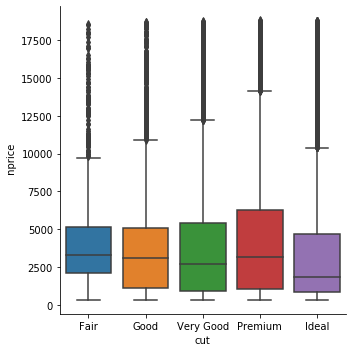

In [15]:
sns.catplot(x="cut", y=" nprice", kind="box", data=df);

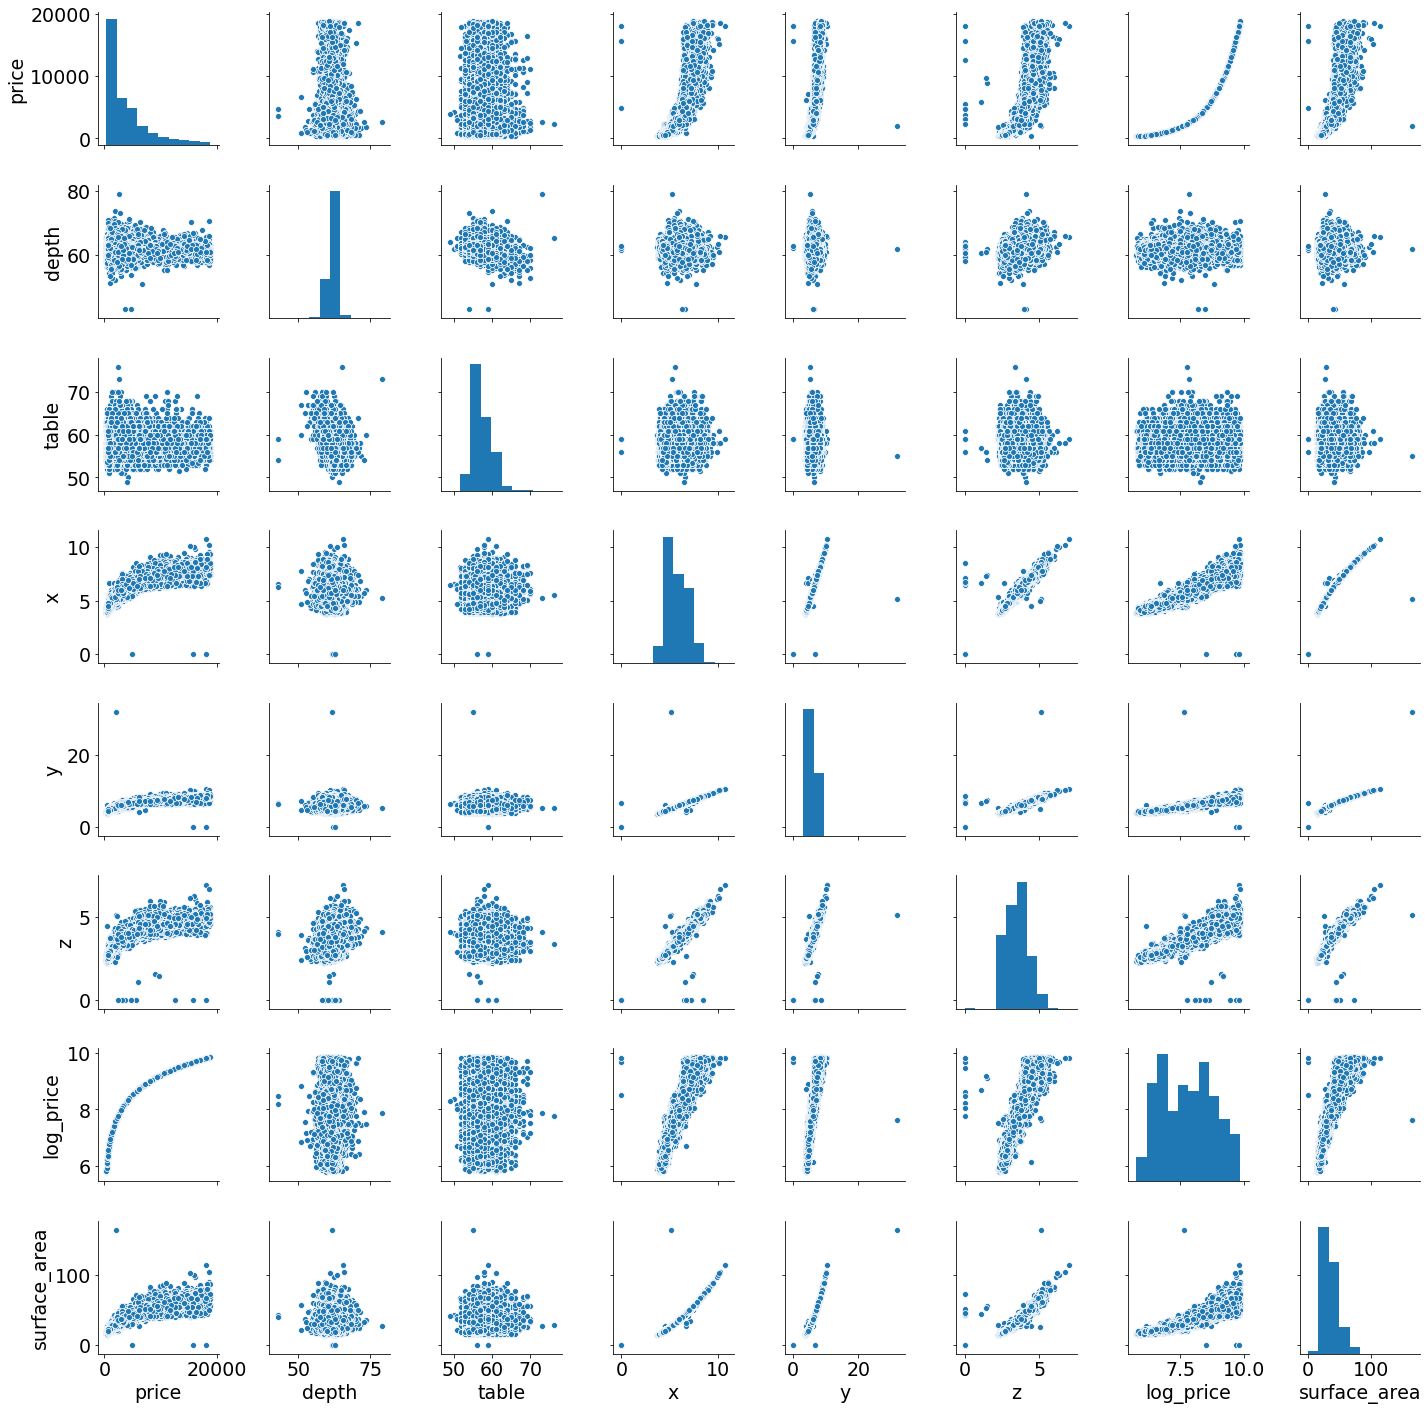

In [191]:
sns.pairplot(train)

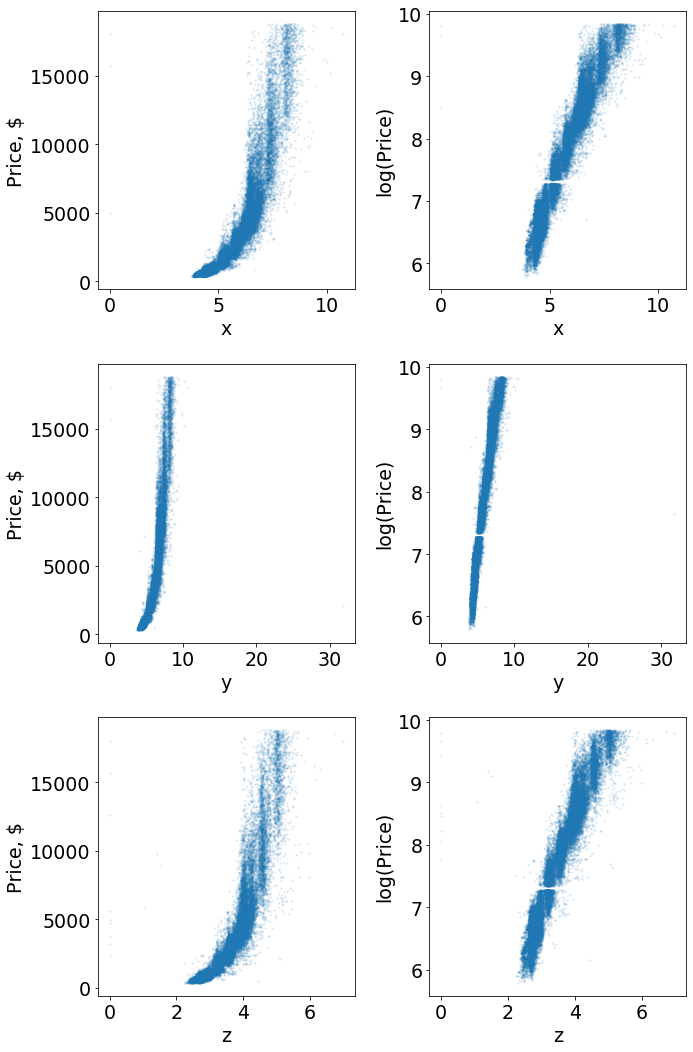

In [219]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15))
ax[0,0].scatter(train['x'], train['price'], s=2, alpha=.1)
ax[0,0].set(ylabel='Price, $', xlabel='x')
ax[0,1].scatter(train['x'], np.log(train['price']), s=2, alpha=.1)
ax[0,1].set(ylabel='log(Price)', xlabel='x')
ax[1,0].scatter(train['y'], train['price'], s=2, alpha=.1)
ax[1,0].set(ylabel='Price, $', xlabel='y')
ax[1,1].scatter(train['y'], np.log(train['price']), s=2, alpha=.1)
ax[1,1].set(ylabel='log(Price)', xlabel='y')
ax[2,0].scatter(train['z'], train['price'], s=2, alpha=.1)
ax[2,0].set(ylabel='Price, $', xlabel='z')
ax[2,1].scatter(train['z'], np.log(train['price']), s=2, alpha=.1)
ax[2,1].set(ylabel='log(Price)', xlabel='z')
plt.tight_layout()
fig.savefig('images/log_scale.png', dpi=100)